<a href="https://colab.research.google.com/github/Sabari2401/InsuranceData-AnalysticsProject/blob/main/Flatresale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df=pd.read_csv('/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df.head(3)



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [10]:
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [11]:
df['month'] = pd.to_datetime(df['month'])
df['month_num']=df['month'].dt.month
df['year']=df['month'].dt.year

In [12]:
df.drop('month',axis=1, inplace=True)


In [13]:
def convert_remaining_lease(rem_lease):
  rem_lease=rem_lease.replace('months','month')
  if 'month' in rem_lease:
    year,mon=rem_lease.split(' years ')
    mon=mon.replace('month','')
    return int(year)*12+int(mon)
  else:
    year=rem_lease.split(' years')[0]
    return int(year)*12

df['remaining_lease']=df['remaining_lease'].apply(convert_remaining_lease)


In [14]:
df.head(4)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,month_num,year
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,736,232000.0,1,2017
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,727,250000.0,1,2017
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,262000.0,1,2017
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,745,265000.0,1,2017


In [ ]:
df.select_dtypes(include='object').columns


Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')

CHECKING NULL VALUES

In [ ]:
df.isnull().sum()

,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0
resale_price,0


In [ ]:
df.shape

(205497, 12)

REMOVING DUPLICATES

In [ ]:
duplicates=df[df.duplicated]
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(205196, 12)

In [ ]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,month_num,year
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,736,232000.0,1,2017
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,727,250000.0,1,2017
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,262000.0,1,2017
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,745,265000.0,1,2017
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,749,265000.0,1,2017


In [ ]:
!pip install category_encoders

TRAIN TEST SPLIT

In [ ]:

from sklearn.model_selection import train_test_split
import category_encoders as ce
x=df.drop(columns=['resale_price'])
y=df['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
col=df.select_dtypes(include='object').columns

In [ ]:
col

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')

ENCODING

In [ ]:
encoder=ce.TargetEncoder(cols=col)
encoder.fit(x_train, y_train)
x_train_encoder=encoder.transform(x_train)
x_test_encoder=encoder.transform(x_test)


x_train_encoder.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,month_num,year
183162,577408.515644,611130.15979,490515.331343,450141.493888,550273.400990,118.0,522800.699349,1984,713,8,2024
137043,547021.751485,516587.83620,526335.105371,512491.424242,484256.849492,107.0,505209.579235,1993,847,1,2022
194102,467613.972117,516587.83620,506932.648128,558599.884388,511529.359794,93.0,505209.579235,2018,1112,12,2024
139622,467613.972117,611130.15979,459549.767412,475664.185501,484256.849492,119.0,522800.699349,1997,893,1,2022
172458,488782.855504,516587.83620,489001.520649,587531.508039,484256.849492,93.0,376868.746082,1984,715,6,2024


NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train_encoder)
x_test_scaled=scaler.transform(x_test_encoder)

x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train_encoder.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test_encoder.columns)
x_train_scaled.head()


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,month_num,year
0,0.431483,0.63514,0.235619,0.217484,0.148590,0.259160,0.220107,0.327273,0.335260,0.636364,0.875
1,0.336077,0.48174,0.280923,0.295229,0.033994,0.226393,0.198066,0.490909,0.528902,0.000000,0.625
2,0.086761,0.48174,0.256383,0.352723,0.081335,0.184689,0.198066,0.945455,0.911850,1.000000,0.875
3,0.086761,0.63514,0.196455,0.249309,0.033994,0.262139,0.220107,0.563636,0.595376,0.000000,0.625
4,0.153225,0.48174,0.233704,0.388798,0.033994,0.184689,0.037262,0.327273,0.338150,0.454545,0.875


In [ ]:
def analyse_distribution(x_train_scaled):
  skewness={}
  for cols in x_train_scaled.columns:
    skew=x_train_scaled[cols].skew()
    skewness[cols]=skew
    if abs(skew)<0.5:
      print(f"{cols} is normally distributed")
    else:
      print(f"{cols} is not normally distributed")

analyse_distribution(x_train_scaled)


town is not normally distributed
flat_type is normally distributed
block is not normally distributed
street_name is not normally distributed
storey_range is not normally distributed
floor_area_sqm is normally distributed
flat_model is not normally distributed
lease_commence_date is normally distributed
remaining_lease is normally distributed
month_num is normally distributed
year is normally distributed


REMOVING OUTLIERS

In [ ]:
import numpy as np
from scipy.stats import zscore
zscores=np.abs(zscore(x_train_scaled))
threshold=3
outliers=np.where(zscores>threshold)
outliers

mask = (zscores < 3).all(axis=1)

x_train_scaled_clean = x_train_scaled[mask].reset_index(drop=True)
y_train_clean = y_train.loc[mask].reset_index(drop=True)

print(f"Removed {len(x_train_scaled) - len(x_train_scaled_clean)} outliers from training data")

Removed 10518 outliers from training data


MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(x_train_scaled_clean,y_train_clean)
y_pred=model.predict(x_test_scaled)
rmse=mean_squared_error(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
r2 = metrics.r2_score(y_test, y_pred)

RMSE: 5902308616.96


EVALUATION METRICS

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 57395.978466012624
Mean Squared Error: 5902308616.957482
Root Mean Squared Error: 76826.48382528959
R² Score: 0.8217


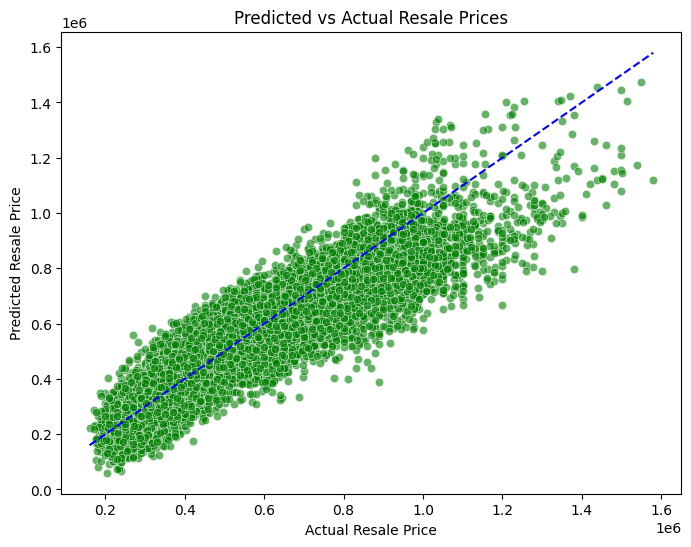

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pred_vs_actual(y_test, y_pred):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6,color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
    plt.xlabel('Actual Resale Price')
    plt.ylabel('Predicted Resale Price')
    plt.title('Predicted vs Actual Resale Prices')
    plt.show()

plot_pred_vs_actual(y_test, y_pred)

In [ ]:
print(zscores)

[[1.10507695 0.89620745 0.23715356 ... 1.06014604 0.44090249 1.30718926]
 [0.57688429 0.02536005 0.17503748 ... 0.26943816 1.59742915 0.46104361]
 [0.80340767 0.02536005 0.04823358 ... 1.29427517 1.60566342 1.30718926]
 ...
 [0.3208359  0.89620745 1.0494003  ... 1.06414377 0.73209272 0.46104361]
 [0.43544322 0.89620745 1.62067697 ... 1.42999369 0.73209272 0.88411643]
 [0.39162971 0.02536005 0.01483327 ... 0.6588913  1.31447319 0.46104361]]


Decision tree

In [75]:
import pandas as pd
df=pd.read_csv('/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [76]:
df['month'] = pd.to_datetime(df['month'])
df['month_num']=df['month'].dt.month
df['year']=df['month'].dt.year

In [77]:
df.drop('month',axis=1, inplace=True)

In [78]:
def convert_remaining_lease(rem_lease):
  rem_lease=rem_lease.replace('months','month')
  if 'month' in rem_lease:
    year,mon=rem_lease.split(' years ')
    mon=mon.replace('month','')
    return int(year)*12+int(mon)
  else:
    year=rem_lease.split(' years')[0]
    return int(year)*12

df['remaining_lease']=df['remaining_lease'].apply(convert_remaining_lease)


REMOVING DUPLICATES

In [79]:
duplicates=df[df.duplicated]
df.drop_duplicates(inplace=True)

TRAIN TEST SPLIT

In [80]:
!pip install category_encoders
from sklearn.model_selection import train_test_split
import category_encoders as ce
x=df.drop(columns=['resale_price'])
y=df['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

ENCODING

In [81]:
col=df.select_dtypes(include='object').columns
encoder=ce.TargetEncoder(cols=col)
encoder.fit(x_train, y_train)
x_train_encoder=encoder.transform(x_train)
x_test_encoder=encoder.transform(x_test)


x_train_encoder.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,month_num,year
183162,577408.515644,611130.15979,490515.331343,450141.493888,550273.400990,118.0,522800.699349,1984,713,8,2024
137043,547021.751485,516587.83620,526335.105371,512491.424242,484256.849492,107.0,505209.579235,1993,847,1,2022
194102,467613.972117,516587.83620,506932.648128,558599.884388,511529.359794,93.0,505209.579235,2018,1112,12,2024
139622,467613.972117,611130.15979,459549.767412,475664.185501,484256.849492,119.0,522800.699349,1997,893,1,2022
172458,488782.855504,516587.83620,489001.520649,587531.508039,484256.849492,93.0,376868.746082,1984,715,6,2024


REMOVING OUTLIERS

In [90]:
import numpy as np
from scipy.stats import zscore
zscores=np.abs(zscore(x_train_encoder))
threshold=3
outliers=np.where(zscores>threshold)
outliers

mask = (zscores < 3).all(axis=1)

x_train_clean = x_train_encoder[mask].reset_index(drop=True)
y_train_clean = y_train.loc[mask].reset_index(drop=True)

print(f"Removed {len(x_train_encoder) - len(x_train_clean)} outliers from training data")

Removed 10518 outliers from training data


In [92]:
from sklearn.tree import DecisionTreeRegressor
from numpy import log1p, expm1

model=DecisionTreeRegressor(random_state=42)
y_train_log = log1p(y_train_clean)
model.fit(x_train_clean,y_train_log)

y_pred_log = model.predict(x_test_encoder)
y_pred = expm1(y_pred_log)

from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = metrics.r2_score(y_test, y_pred)

# Print all
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")




Mean Absolute Error (MAE): 33293.94
Mean Squared Error (MSE): 2768596702.54
Root Mean Squared Error (RMSE): 52617.46
R² Score: 0.9164


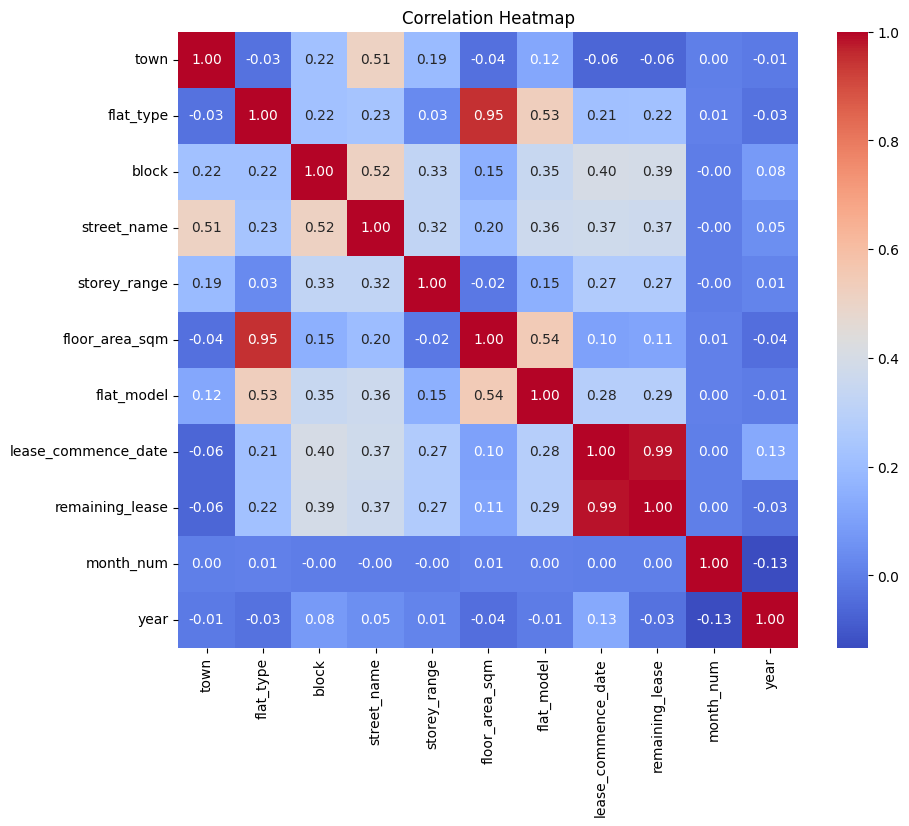

In [ ]:
import seaborn as sns
correlation_matrix =x_train_encoder.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = x_train_encoder.corr(numeric_only=True)
combined_train_data = pd.concat([x_train_clean, y_train_clean], axis=1)
combined_train_data
correlation_matrix = combined_train_data.corr(numeric_only=True)
target_corr = correlation_matrix['resale_price']
target_corr = target_corr.sort_values(ascending=False)
print(target_corr)



resale_price           1.000000
flat_type              0.650658
floor_area_sqm         0.637746
street_name            0.547130
flat_model             0.504676
block                  0.447678
year                   0.400597
lease_commence_date    0.352450
remaining_lease        0.289392
storey_range           0.231559
town                   0.208540
month_num             -0.015253
Name: resale_price, dtype: float64


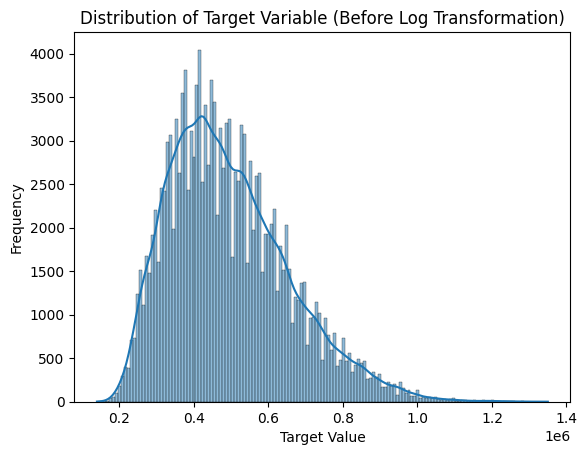

Skewness of original target: 0.75


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Original target variable
sns.histplot(y_train_clean, kde=True)
plt.title("Distribution of Target Variable (Before Log Transformation)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()
original_skew = skew(y_train_clean)
print(f"Skewness of original target: {original_skew:.2f}")